# Q1. 
Use linear regression to fit a straight line to the given database. Set your learning rate to 0.5. What are the cost function value and learning parameters values after convergence? Also, mention the convergence criteria you used.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and normalize the data
X = pd.read_csv('linearX.csv', header=None).values.flatten()
Y = pd.read_csv('linearY.csv', header=None).values.flatten()

# Normalize X
X = (X - np.mean(X)) / np.std(X, ddof=0)

# Gradient descent for linear regression
def gradient_descent(X, Y, lr, iterations):
    theta0, theta1 = 0, 0  # Initialize parameters
    m = len(Y)
    cost_history = []

    for i in range(iterations):
        predictions = theta0 + theta1 * X
        error = predictions - Y
        theta0 -= lr * np.mean(error)
        theta1 -= lr * np.mean(error * X)
        cost = np.mean(error ** 2) / 2  # Cost function
        cost_history.append(cost)
    
    return theta0, theta1, cost_history

# Train model with lr = 0.5
theta0, theta1, cost_history = gradient_descent(X, Y, lr=0.5, iterations=100)

# Print results
print(f"Final Parameters: Theta0 = {theta0}, Theta1 = {theta1}")
print(f"Final Cost: {cost_history[-1]}")


Final Parameters: Theta0 = 0.9966200999999999, Theta1 = 0.0013401960185109828
Final Cost: 1.1947898109836603e-06


# Q2. 
The cost function that we are using in this assignment different than the one we used in class. Can you think of the advantage of averaging the cost?

The average ensures the cost function is independent of dataset size, making it comparable across datasets.

# Q3.
Plot cost function v/s iteration graph for the model in question 1 for first 50 iterations.


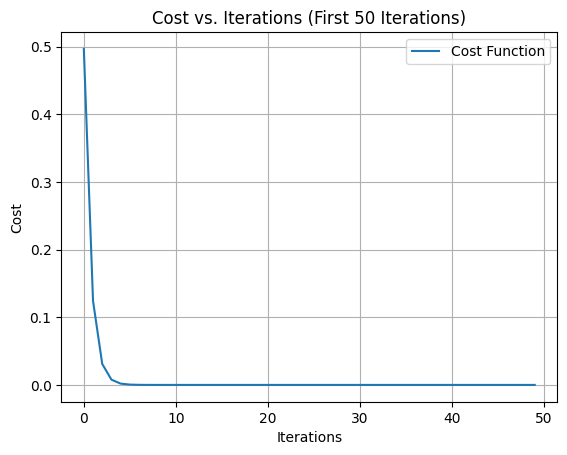

In [73]:
# Plot cost vs. iterations for lr = 0.5
plt.plot(range(50), cost_history[:50], label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations (First 50 Iterations)')
plt.legend()
plt.grid()
plt.show()

# Q4.
Plot the given dataset on a graph and also print the straight line you obtained in question 1 to show how it fits the data.

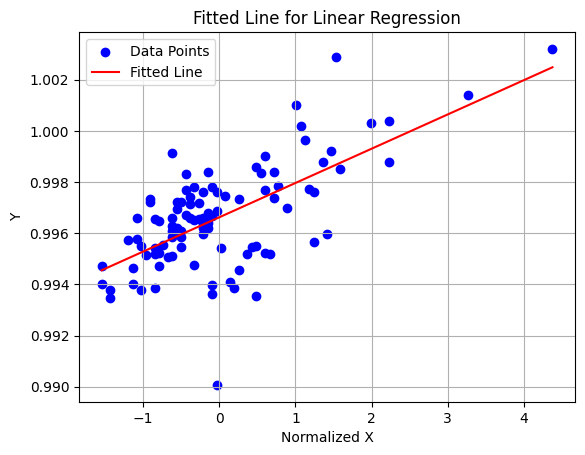

In [74]:
# Plot the dataset
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot the fitted line
line_X = np.linspace(min(X), max(X), 100)
line_Y = theta0 + theta1 * line_X
plt.plot(line_X, line_Y, color='red', label='Fitted Line')

plt.xlabel('Normalized X')
plt.ylabel('Y')
plt.title('Fitted Line for Linear Regression')
plt.legend()
plt.grid()
plt.show()

# Q5. 
Test your regression model with the learning rates lr = 0.005, lr = 0.5, lr = 5 For each learning rate, plot a graph showing how the cost function changes for the first 50 iterations and write your observation.

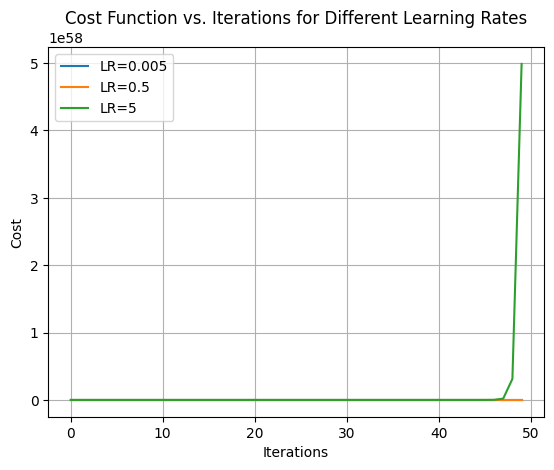

In [75]:
def gradient_descent(X, Y, lr, iterations):
    theta0, theta1 = 0, 0  # Initialize parameters
    m = len(Y)
    cost_history = []

    for _ in range(iterations):
        predictions = theta0 + theta1 * X
        error = predictions - Y
        theta0 -= lr * np.mean(error)
        theta1 -= lr * np.mean(error * X)
        cost = np.mean(error ** 2) / 2  # Cost function
        cost_history.append(cost)
    
    return theta0, theta1, cost_history

# Run gradient descent for different learning rates
learning_rates = [0.005, 0.5, 5]
iterations = 50

for lr in learning_rates:
    theta0, theta1, cost_history = gradient_descent(X, Y, lr, iterations)
    
    # Plot the cost history
    plt.plot(range(iterations), cost_history, label=f'LR={lr}')

# Customize the plot
plt.title('Cost Function vs. Iterations for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

# Q6.
Choose a suitable learning rate, then implement stochastic and min-batch gradient descent, plot the cost function against iteration, and observe how your cost function changes compared to batch gradient descent.

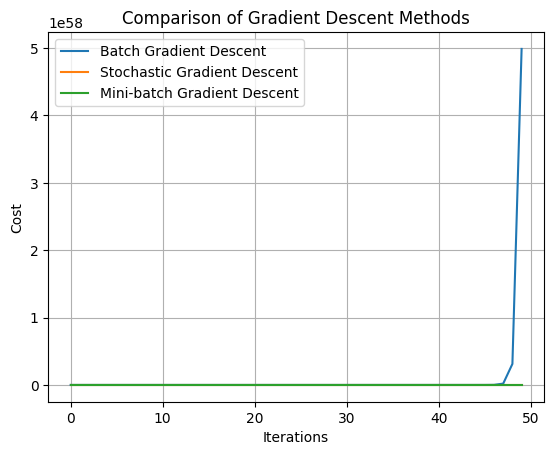

In [76]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, Y, lr, iterations):
    theta0, theta1 = 0, 0
    m = len(Y)
    cost_history = []

    for _ in range(iterations):
        for i in range(m):  # Loop over each data point
            prediction = theta0 + theta1 * X[i]
            error = prediction - Y[i]
            theta0 -= lr * error
            theta1 -= lr * error * X[i]
        # Calculate cost after each full pass through the data
        total_cost = np.mean((theta0 + theta1 * X - Y) ** 2) / 2
        cost_history.append(total_cost)
    
    return theta0, theta1, cost_history

# Mini-batch Gradient Descent
def mini_batch_gradient_descent(X, Y, lr, iterations, batch_size=10):
    theta0, theta1 = 0, 0
    m = len(Y)
    cost_history = []

    for _ in range(iterations):
        for i in range(0, m, batch_size):  # Process in batches
            X_batch = X[i:i + batch_size]
            Y_batch = Y[i:i + batch_size]
            predictions = theta0 + theta1 * X_batch
            error = predictions - Y_batch
            theta0 -= lr * np.mean(error)
            theta1 -= lr * np.mean(error * X_batch)
        # Calculate cost after each full pass through the data
        total_cost = np.mean((theta0 + theta1 * X - Y) ** 2) / 2
        cost_history.append(total_cost)
    
    return theta0, theta1, cost_history

# Run and plot all methods
lr = 0.05
iterations = 50

theta0_sgd, theta1_sgd, cost_history_sgd = stochastic_gradient_descent(X, Y, lr, iterations)
theta0_mbgd, theta1_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X, Y, lr, iterations)

plt.plot(range(len(cost_history)), cost_history, label='Batch Gradient Descent')
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label='Stochastic Gradient Descent')
plt.plot(range(len(cost_history_mbgd)), cost_history_mbgd, label='Mini-batch Gradient Descent')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Comparison of Gradient Descent Methods')
plt.legend()
plt.grid()
plt.show()